### 1. Визначити номер варіанта за формулою:
### N = ord(X) % 5 + 1,
### де X – перша велика літера вашого імені в латинській транскрипції.

In [2]:
N = ord("M") % 5 + 1
print(N)

3


### 2. Завантажити дані з файлу kr1.xlsx до датафрейму.
### 3. Отримати дані до свого варіанту програмно з датафрейму, використовуючи інструменти індексування.

In [4]:
import cv2
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

file_path = r"data/lab6.xlsx"

data = pd.read_excel(file_path)
data_for_variant = data.iloc[N - 1]
data_for_variant

N                        3
file name        draco.jpg
image size         700x700
glasses color         cian
line width               4
Name: 2, dtype: object

### 4. Створити функцію, що приймає в якості аргументів дані з датафрейму та повертає зменшене зображення з доданими «круглими окулярами» та зберігає отримане зображення у файл.

In [10]:
def add_glasses_to_image(image_path, output_path, glasses_color=(0, 255, 0), line_thickness=4):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        return

    x, y, w, h = faces[0]
    face_region = gray_img[y:y + h, x:x + w]
    upper_half = face_region[:h // 2, :]
    eyes = eye_cascade.detectMultiScale(upper_half, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))

    if len(eyes) < 2:
        return

    eyes = sorted(eyes, key=lambda eye: eye[0])

    left_eye_center = (x + eyes[0][0] + eyes[0][2] // 2, y + eyes[0][1] + eyes[0][3] // 2)
    right_eye_center = (x + eyes[1][0] + eyes[1][2] // 2, y + eyes[1][1] + eyes[1][3] // 2)
    left_eye_radius = max(eyes[0][2], eyes[0][3]) // 2
    right_eye_radius = max(eyes[1][2], eyes[1][3]) // 2

    img_copy = img.copy()

    cv2.circle(img_copy, left_eye_center, left_eye_radius, glasses_color, line_thickness)
    cv2.circle(img_copy, right_eye_center, right_eye_radius, glasses_color, line_thickness)

    left_edge = (left_eye_center[0] + left_eye_radius, left_eye_center[1])
    right_edge = (right_eye_center[0] - right_eye_radius, right_eye_center[1])
    cv2.line(img_copy, left_edge, right_edge, glasses_color, line_thickness)

    left_side = (left_eye_center[0] - left_eye_radius - 30, left_eye_center[1])
    right_side = (right_eye_center[0] + right_eye_radius + 30, right_eye_center[1])
    cv2.line(img_copy, (left_eye_center[0] - left_eye_radius, left_eye_center[1]), left_side, glasses_color,
             line_thickness)
    cv2.line(img_copy, (right_eye_center[0] + right_eye_radius, right_eye_center[1]), right_side, glasses_color,
             line_thickness)

    resized_image = cv2.resize(img_copy, (300, 300))
    cv2.imwrite(output_path, resized_image)

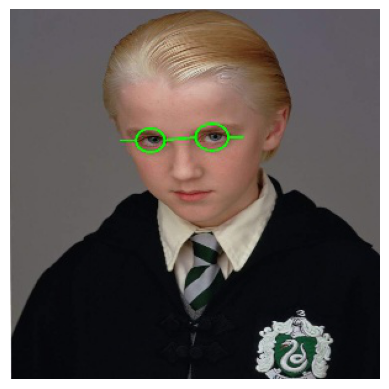

In [39]:
image_path = r"Images/draco.jpg"
output_file = r"Images/result.jpg"
add_glasses_to_image(image_path, output_file)

result = Image.open(output_file)
plt.imshow(result)
plt.axis('off')
plt.show()

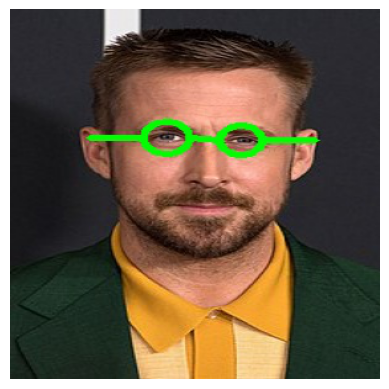

In [41]:
image_path = r"Images/rayan_gosling.jpg"
output_file = r"Images/result2.jpg"
add_glasses_to_image(image_path, output_file)

result = Image.open(output_file)
plt.imshow(result)
plt.axis('off')
plt.show()